# AML HW3 Q2

Dataset used:
https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset/data

In [62]:
!unzip '/content/archive (1).zip'

Archive:  /content/archive (1).zip
replace Covid19-dataset/test/Covid/0100.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Covid19-dataset/test/Covid/0100.jpeg  
replace Covid19-dataset/test/Covid/0102.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Covid19-dataset/test/Covid/0102.jpeg  
  inflating: Covid19-dataset/test/Covid/0105.png  
  inflating: Covid19-dataset/test/Covid/0106.jpeg  
  inflating: Covid19-dataset/test/Covid/0108.jpeg  
  inflating: Covid19-dataset/test/Covid/0111.jpg  
  inflating: Covid19-dataset/test/Covid/0112.jpg  
  inflating: Covid19-dataset/test/Covid/0113.jpg  
  inflating: Covid19-dataset/test/Covid/0115.jpeg  
  inflating: Covid19-dataset/test/Covid/0118.jpeg  
  inflating: Covid19-dataset/test/Covid/0119.jpeg  
  inflating: Covid19-dataset/test/Covid/0120.jpg  
  inflating: Covid19-dataset/test/Covid/094.png  
  inflating: Covid19-dataset/test/Covid/096.png  
  inflating: Covid19-dataset/test/Covid/098.jpeg  
  inflating: Covid19-da

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
import warnings
warnings.filterwarnings("ignore")

In [64]:
def load_image(image_path, img_size=(64, 64)):
    image = cv2.imread(image_path)
    image = cv2.resize(image, img_size)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [65]:
test_path = '/content/Covid19-dataset/test'
train_path = '/content/Covid19-dataset/train'
x_train = []
y_train = []
x_test = []
y_test = []

In [66]:
for label_dir in os.listdir(train_path):
    if os.path.isdir(os.path.join(train_path, label_dir)):
        for fle in os.listdir(os.path.join(train_path, label_dir)):
            image_path = os.path.join(train_path, label_dir, fle)
            x_train.append(load_image(image_path))
            y_train.append(label_dir)

In [67]:
for label_dir in os.listdir(test_path):
    if os.path.isdir(os.path.join(test_path, label_dir)):
        for fle in os.listdir(os.path.join(test_path, label_dir)):
            image_path = os.path.join(test_path, label_dir, fle)
            x_test.append(load_image(image_path))
            y_test.append(label_dir)

In [68]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [69]:
np.random.seed(45)

indices = np.random.permutation(len(x_train))
x_train = x_train[indices]
y_train = y_train[indices]

test_indices = np.random.permutation(len(x_test))
x_test = x_test[test_indices]
y_test = y_test[test_indices]

In [70]:
y_train

array(['Covid', 'Covid', 'Viral Pneumonia', 'Normal', 'Covid',
       'Viral Pneumonia', 'Covid', 'Covid', 'Covid', 'Normal', 'Normal',
       'Covid', 'Viral Pneumonia', 'Covid', 'Viral Pneumonia', 'Covid',
       'Covid', 'Covid', 'Covid', 'Normal', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Normal', 'Viral Pneumonia', 'Normal',
       'Covid', 'Covid', 'Covid', 'Normal', 'Normal', 'Covid', 'Normal',
       'Covid', 'Covid', 'Normal', 'Normal', 'Viral Pneumonia', 'Normal',
       'Normal', 'Covid', 'Viral Pneumonia', 'Viral Pneumonia', 'Covid',
       'Normal', 'Normal', 'Normal', 'Covid', 'Viral Pneumonia', 'Normal',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Viral Pneumonia',
       'Normal', 'Viral Pneumonia', 'Normal', 'Viral Pneumonia', 'Normal',
       'Covid', 'Viral Pneumonia', 'Viral Pneumonia', 'Covid', 'Normal',
       'Viral Pneumonia', 'Normal', 'Normal', 'Covid', 'Viral Pneumonia',
       'Viral Pneumonia', 'Covid', 'Viral Pneumonia', 'Viral

## 1. Applying PCA to preserve 90% variance

In [71]:
from sklearn.decomposition import PCA

n_samples = x_train.shape[0]
x_train_reshaped = x_train.reshape(n_samples, -1)

pca = PCA(n_components=0.9, svd_solver='full')
x_pca = pca.fit(x_train_reshaped)

n_components = pca.n_components_
print(f"Number of components needed to preserve 90% variance: {n_components}")

Number of components needed to preserve 90% variance: 73


In [72]:
x_train.shape

(251, 64, 64, 3)

## 2. Plotting original and reconstructed images

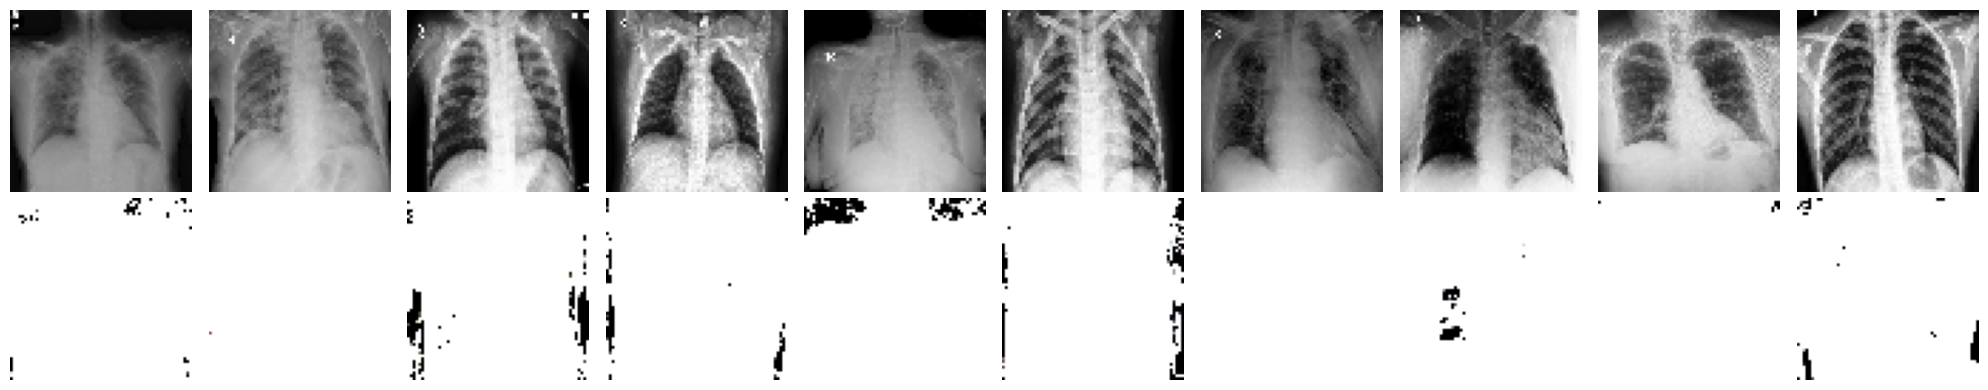

In [73]:
n_images = 10
fig, axes = plt.subplots(2, n_images, figsize=(20, 4))
image_shape = (64, 64, 3)

for i in range(n_images):
    original = x_train[i]
    axes[0, i].imshow(original)
    axes[0, i].axis('off')

    # Flatten the image
    flattened = original.reshape(1, -1)

    # Transform and inverse transform
    reconstructed = pca.inverse_transform(pca.transform(flattened))

    # Reshape back to image shape
    reconstructed = reconstructed.reshape(image_shape)

    axes[1, i].imshow(reconstructed)
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

## 3. Dimensionality reduction and visualization

### 3A. PCA with 2 components

In [74]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(x_train_reshaped)

variance_explained = sum(pca_2d.explained_variance_ratio_)
print(f"Variance explained by first two principal components: {variance_explained:.2%}")

Variance explained by first two principal components: 36.47%


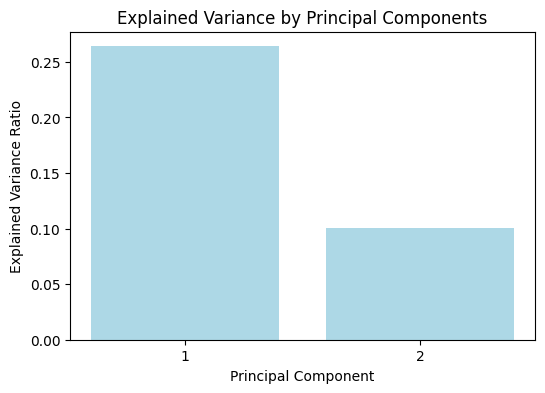

In [75]:
plt.figure(figsize=(6, 4))
plt.bar([1, 2], pca_2d.explained_variance_ratio_, color='lightblue')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.xticks([1, 2])
plt.show()

### 3B. 2D scatter plots

In [76]:
# Assuming these are your unique labels in y_train
unique_labels = np.unique(y_train)  # ['Covid', 'Normal', 'Viral Pneumonia']

# Create a mapping from label to numeric value
label_to_color = {label: idx for idx, label in enumerate(unique_labels)}

# Convert y_train to numeric values using the mapping
y_train_numeric = np.array([label_to_color[label] for label in y_train])

In [77]:
# Select a random subset of images
num_images_to_show = 10
random_indices = np.random.choice(len(x_train_reshaped), num_images_to_show, replace=False)
images_subset = x_train[random_indices]

In [78]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def plot_2d_embedding(X, y_numeric, images, title):
    plt.figure(figsize=(15, 12))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y_numeric, cmap='tab20', alpha=0.6)
    plt.colorbar(scatter, ticks=range(len(np.unique(y_numeric))), label='Categories')
    plt.title(title)

    # Add images to the scatter plot
    for i, idx in enumerate(random_indices):
        img = images[i]
        imagebox = OffsetImage(img, zoom=0.6)
        ab = AnnotationBbox(imagebox, (X[idx, 0], X[idx, 1]), frameon=False, pad=0.1)
        plt.gca().add_artist(ab)

    plt.show()

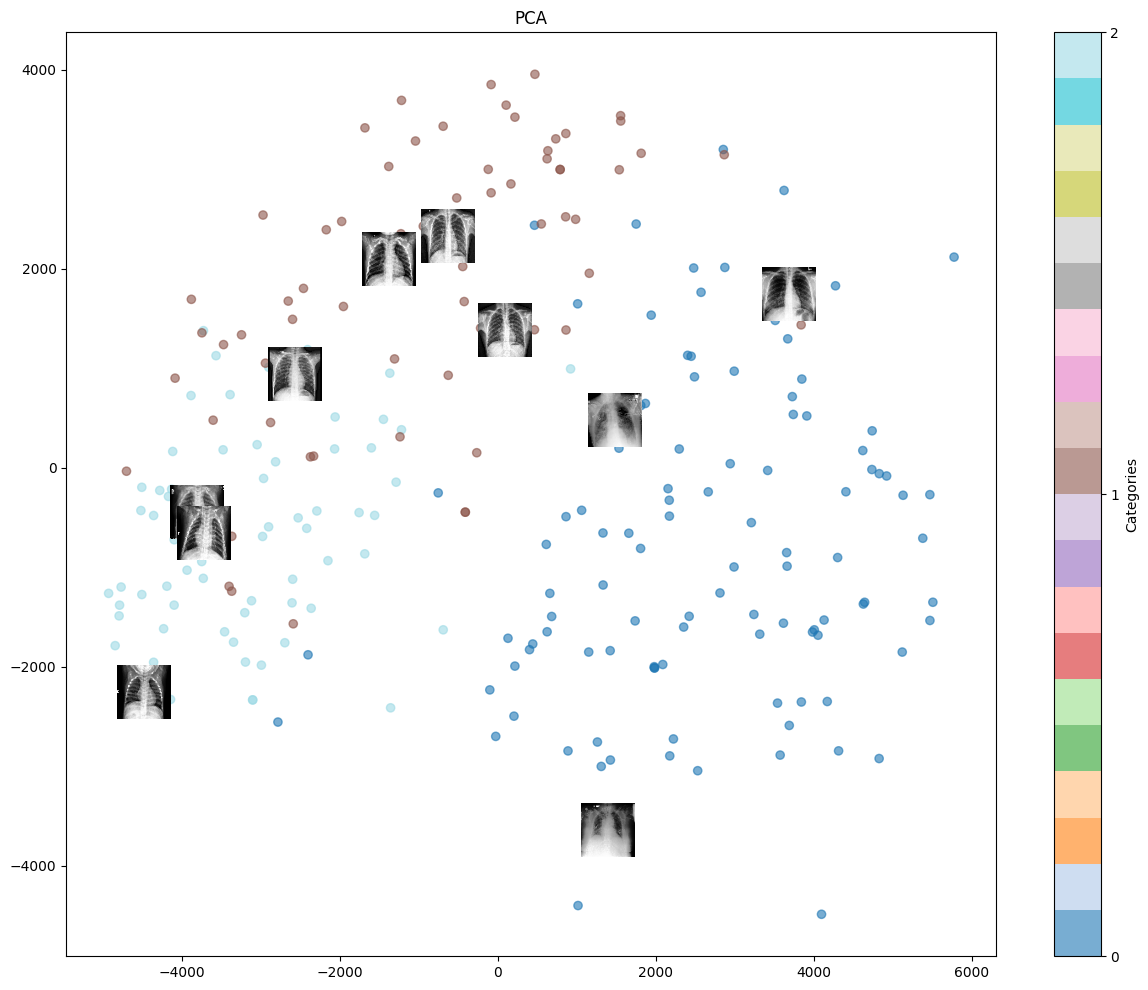

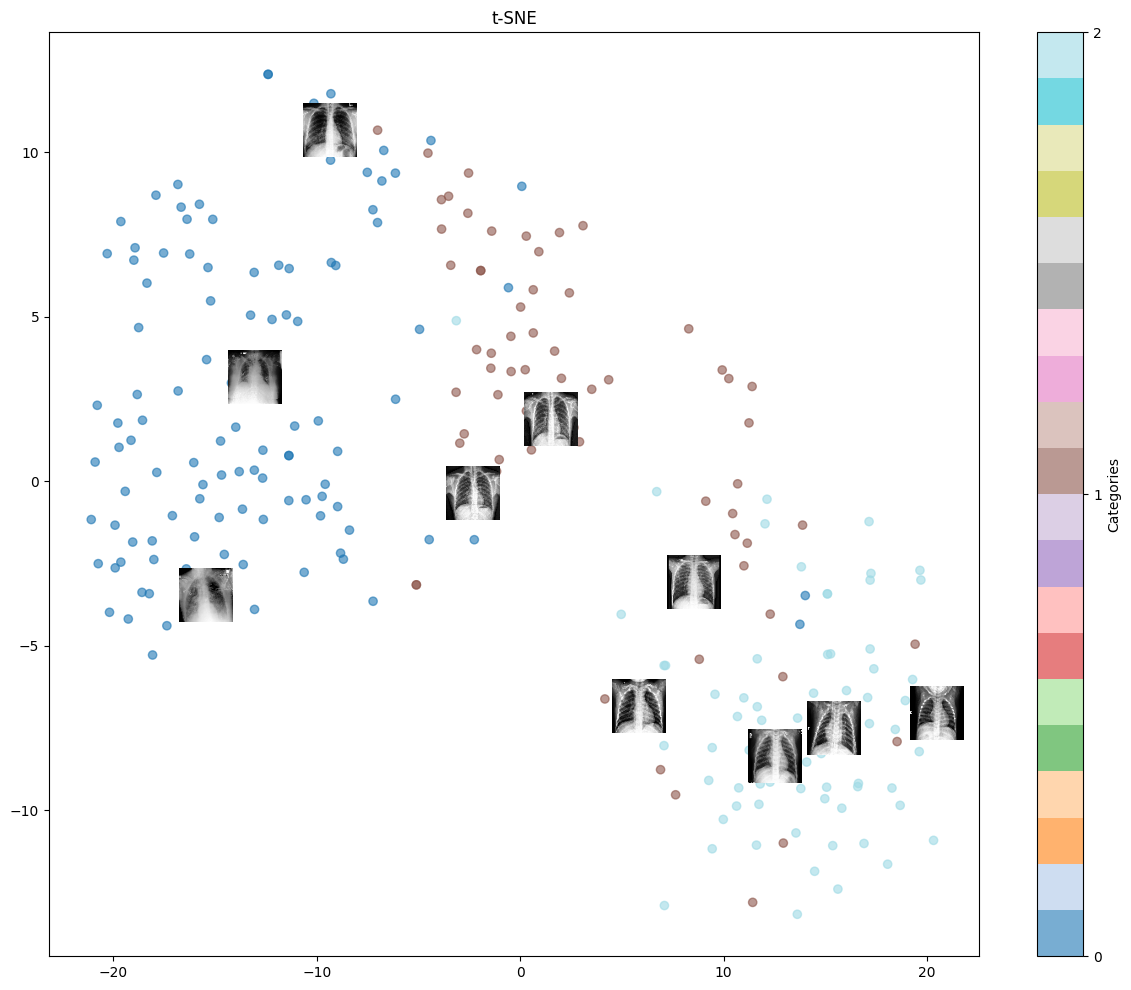

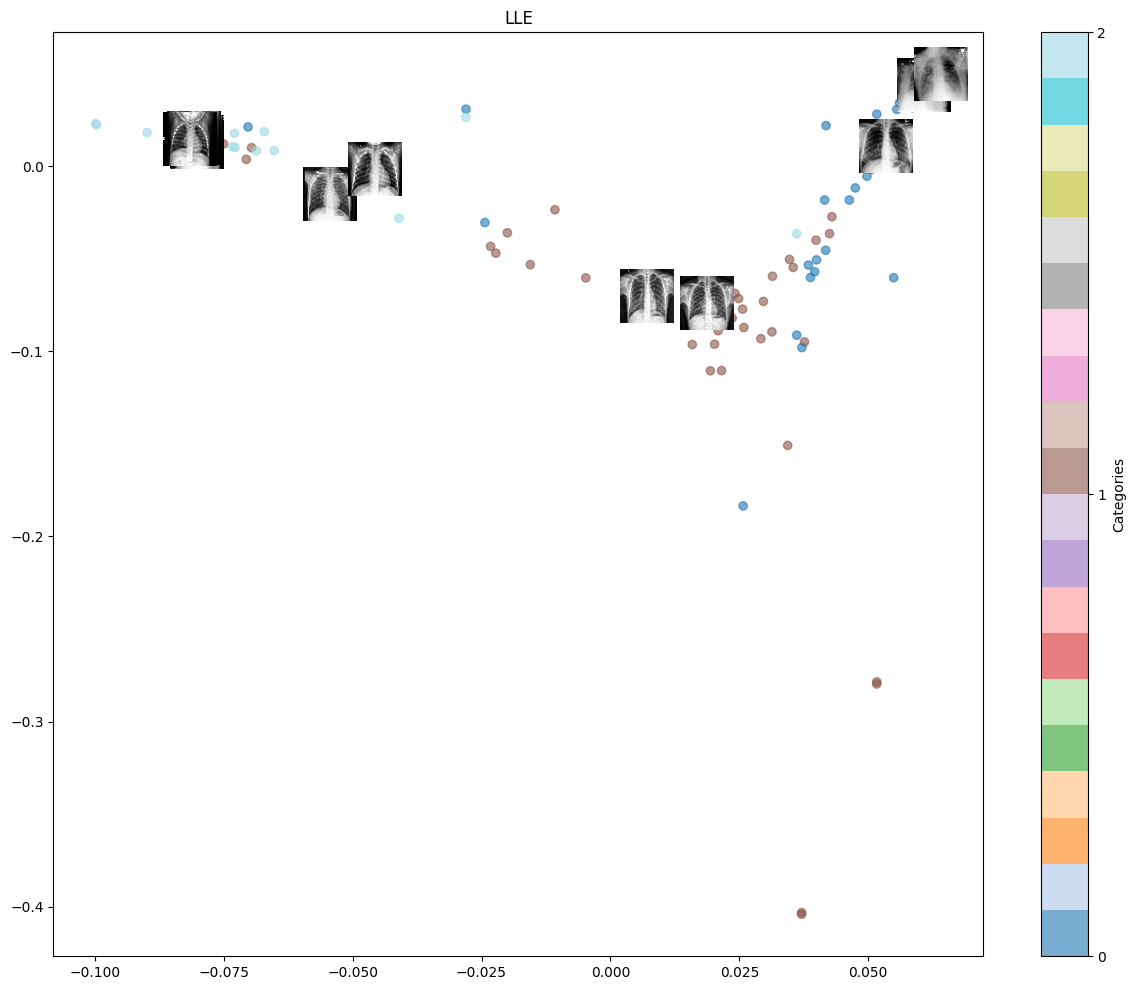

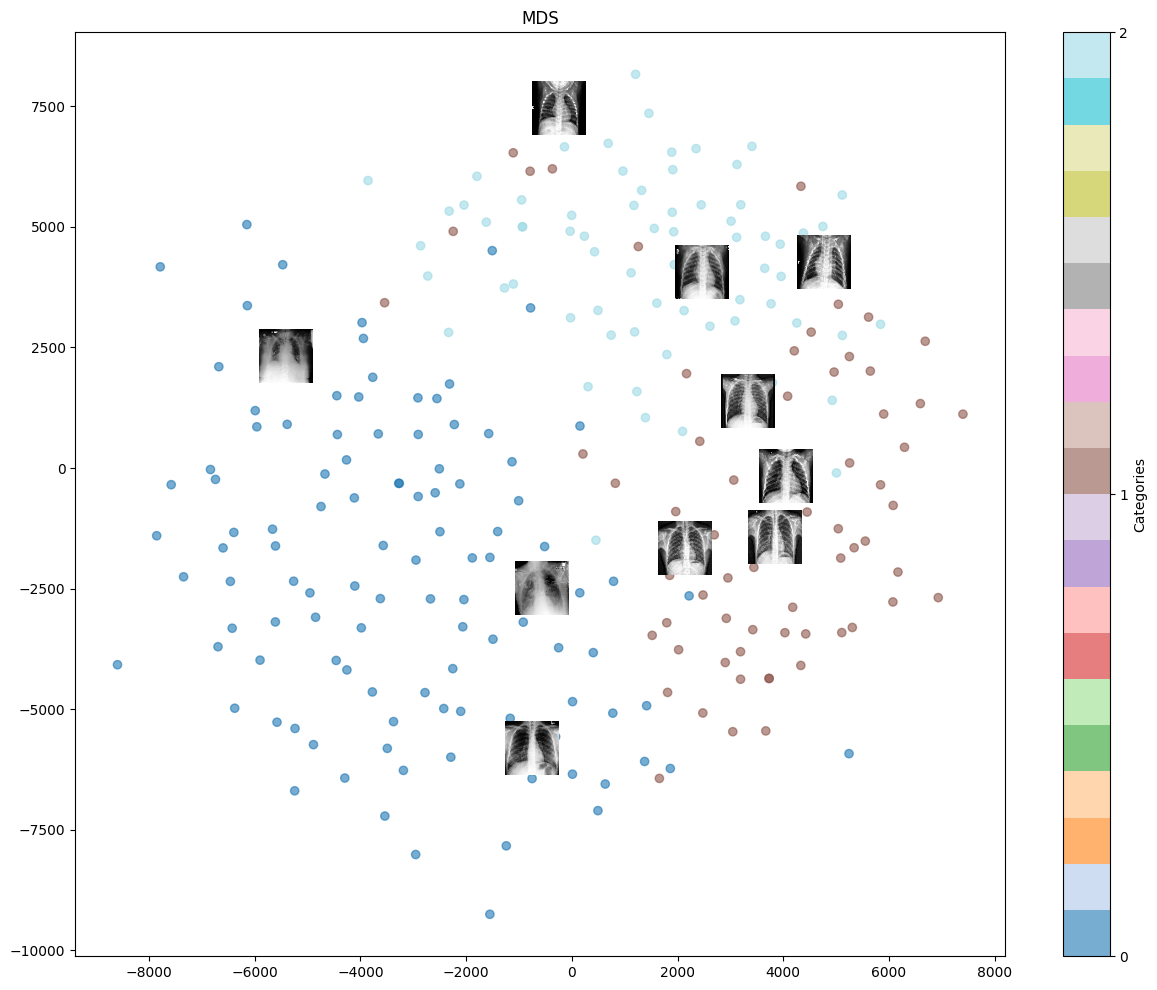

In [79]:
# PCA
pca_2d = PCA(n_components=2)
pca_result = pca_2d.fit_transform(x_train_reshaped)
plot_2d_embedding(pca_result, y_train_numeric, images_subset, 'PCA')

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(x_train_reshaped)
plot_2d_embedding(tsne_result, y_train_numeric, images_subset, 't-SNE')

# LLE
lle = LocallyLinearEmbedding(n_components=2, random_state=42)
lle_result = lle.fit_transform(x_train_reshaped)
plot_2d_embedding(lle_result, y_train_numeric, images_subset, 'LLE')

# MDS
mds = MDS(n_components=2, random_state=42)
mds_result = mds.fit_transform(x_train_reshaped)
plot_2d_embedding(mds_result, y_train_numeric, images_subset, 'MDS')

### 3C. Observations

**PCA Visualization**:  
- Shows a more linear separation of classes compared to t-SNE
- Data points spread across a wider range, roughly from -20 to +20 on both axes
- Exhibits some clustering but with more overlap between categories
- Sample X-ray images show gradual transitions in lung characteristics across the plot
- Less distinct boundaries between clusters compared to t-SNE


**t-SNE Visualization**:  
- Shows clear separation between different classes of lung images
- Forms distinct clusters with some overlap between categories
- Sample lung images are well-distributed across the plot, helping visualize the characteristics of each cluster
- The visualization maintains both local and global structure of the data

**LLE (Locally Linear Embedding)**:  
- Produces a more compressed representation compared to t-SNE
- Shows less distinct separation between classes
- The data points are concentrated in a smaller range (-0.4 to 0.05)
- Sample images appear to be aligned along a curved manifold

**MDS (Multidimensional Scaling)**:  
- Creates a scattered representation with larger numerical ranges (-10000 to 8000)
- Shows some clustering but with significant overlap between classes
- The sample images are more spread out compared to other methods
- Maintains global distances between data points but shows less clear local structure

**Comparative Analysis**  
- t-SNE provides the most interpretable visualization with clear cluster separation
- PCA maintains global structure better than t-SNE but sacrifices local cluster separation
- LLE produces the most compact representation but loses some discriminative power
- MDS maintains global structure but shows more overlap between classes

Each method reveals different aspects of the data structure, with t-SNE being particularly effective at visualizing the distinct characteristics of different lung conditions



## 4. K-Means Clustering

### 4A. Determining number of clusters
Using the elbow method

In [80]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_train_reshaped)

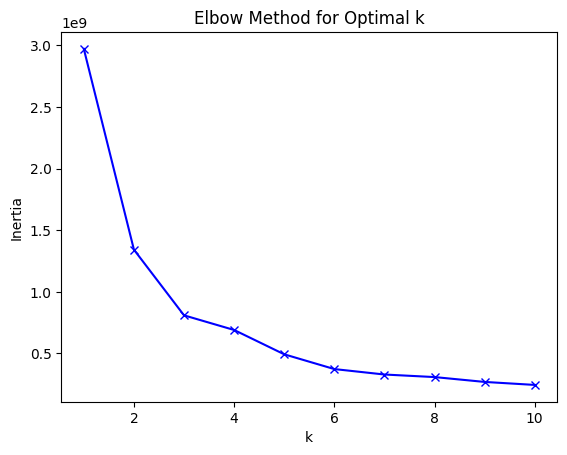

In [81]:
from sklearn.cluster import KMeans

inertias = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_pca)
    inertias.append(kmeans.inertia_)

plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

### 4B. K-Means with 3 clusters

In [82]:
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(x_pca)

print("Cluster labels:", cluster_labels)


Cluster labels: [0 0 1 1 0 1 0 0 0 2 2 0 1 0 1 0 2 0 0 1 0 0 1 0 0 0 1 1 1 0 2 0 1 1 0 1 0
 0 2 2 1 2 1 0 1 1 0 2 2 2 0 1 2 0 0 0 0 0 1 2 1 1 1 2 0 1 1 0 2 1 2 1 0 1
 1 0 1 1 1 2 2 1 0 1 1 1 0 1 1 2 0 2 0 0 0 1 1 0 0 0 0 2 0 0 1 1 0 2 1 0 1
 0 1 0 1 1 2 1 0 0 1 0 0 2 0 1 1 0 1 0 0 0 1 2 1 1 0 1 2 1 1 0 1 2 0 2 0 2
 1 0 1 0 1 2 1 0 0 1 2 0 1 0 2 1 0 0 1 2 1 0 0 0 0 1 1 1 2 1 1 2 0 0 0 1 1
 1 0 0 1 1 1 1 0 2 1 0 0 2 0 2 1 1 2 1 2 2 1 2 0 2 0 0 0 1 1 1 2 1 0 1 1 0
 2 2 2 0 0 0 0 1 2 0 2 1 2 2 0 2 2 1 1 2 0 0 0 1 2 1 1 0 0]


In [83]:
conf_matrix = confusion_matrix(y_train_numeric, cluster_labels)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[99  3  9]
 [ 1 25 44]
 [ 0 69  1]]


In [84]:
cluster_to_label = {}
for i in range(conf_matrix.shape[1]):
    cluster_to_label[i] = np.argmax(conf_matrix[:, i])

print("Cluster to Label Mapping:", cluster_to_label)

#Create a function to remap labels
def remap_labels(labels, mapping):
    return np.array([mapping[label] for label in labels])

Cluster to Label Mapping: {0: 0, 1: 2, 2: 1}


In [85]:
y_true = np.repeat([0, 1, 2], conf_matrix.sum(axis=1))
y_pred = np.concatenate([np.repeat(i, sum(conf_matrix[:, i])) for i in range(conf_matrix.shape[1])])
remapped_labels = remap_labels(y_pred, cluster_to_label)

accuracy = accuracy_score(y_true, remapped_labels)
print(f"Clustering accuracy after remapping: {accuracy:.2%}")

Clustering accuracy after remapping: 46.22%


## 5. EM Clustering

### 5A. Determining number of clusters
Similar to K-Means, but using Gaussian Mixture Models:

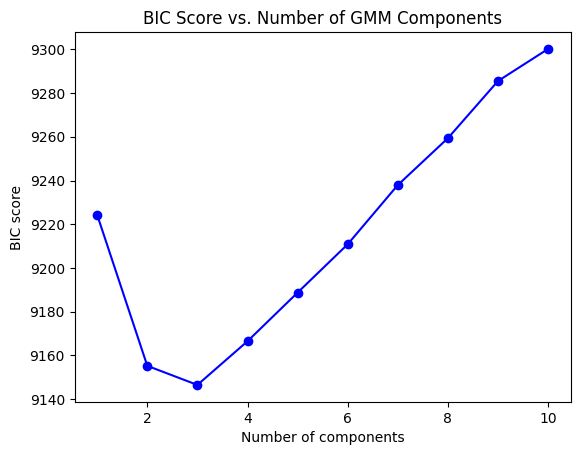

In [86]:
from sklearn.mixture import GaussianMixture

bic_scores = []
n_components_range = range(1, 11)

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(x_pca)
    bic_scores.append(gmm.bic(x_pca))

plt.plot(n_components_range, bic_scores, 'bo-')
plt.xlabel('Number of components')
plt.ylabel('BIC score')
plt.title('BIC Score vs. Number of GMM Components')
plt.show()

### 5B. EM with 3 clusters

In [87]:
gmm = GaussianMixture(n_components=3, random_state=42)
cluster_labels_gmm = gmm.fit_predict(x_pca)

In [88]:
conf_matrix_gmm = confusion_matrix(y_train_numeric, cluster_labels_gmm)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[99  3  9]
 [ 1 25 44]
 [ 0 69  1]]


In [89]:
def map_clusters_to_labels(conf_matrix):
    # For each cluster, find the class with the most members in that cluster
    return {i: np.argmax(conf_matrix[:, i]) for i in range(conf_matrix.shape[1])}

cluster_mapping = map_clusters_to_labels(conf_matrix)
print("Cluster to Label Mapping:", cluster_mapping)

Cluster to Label Mapping: {0: 0, 1: 2, 2: 1}


In [90]:
remapped_labels_gmm = [cluster_mapping[label] for label in cluster_labels_gmm]

In [91]:
accuracy = accuracy_score(y_train_numeric, remapped_labels_gmm)
print(f"Clustering accuracy after remapping: {accuracy:.2%}")

Clustering accuracy after remapping: 84.46%


### 5C. Generating new images

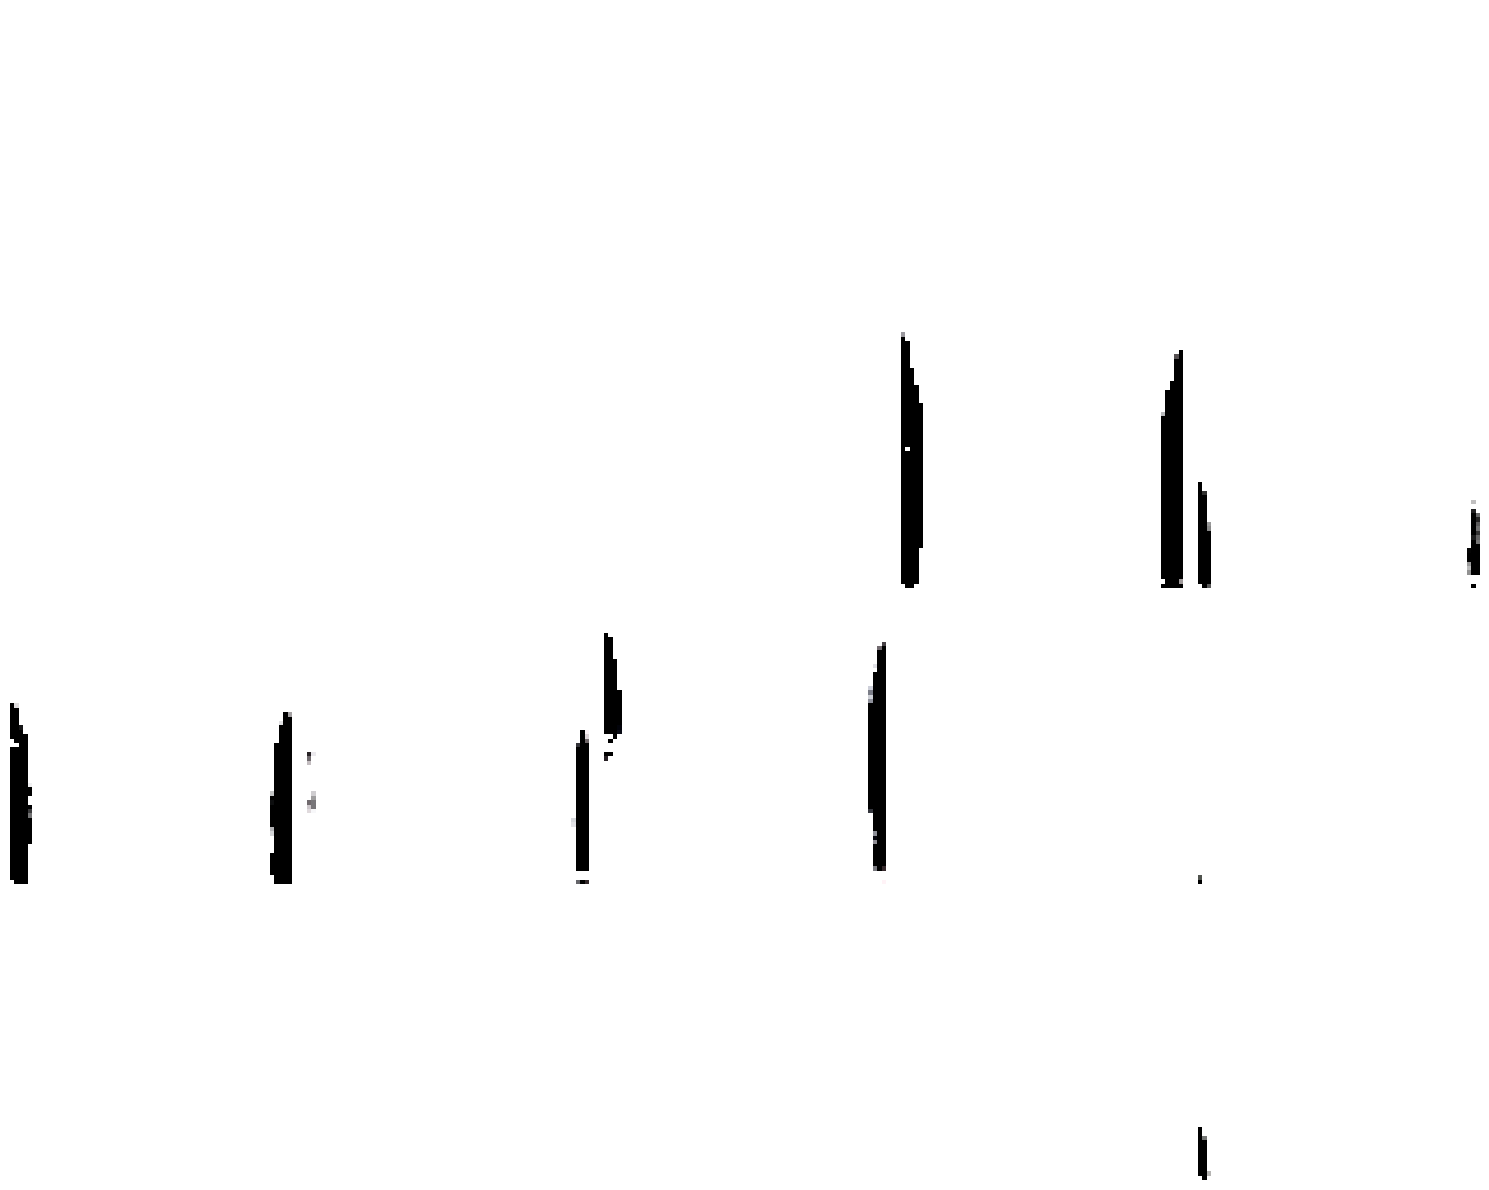

In [92]:
n_samples = 20
generated_samples = gmm.sample(n_samples)[0]
reconstructed_images = pca.inverse_transform(generated_samples)

# Normalize the reconstructed images
reconstructed_images = np.clip(reconstructed_images, 0, 1)

fig, axes = plt.subplots(4, 5, figsize=(15, 12))
for i, ax in enumerate(axes.flat):
    if i < n_samples:
        ax.imshow(reconstructed_images[i].reshape(image_shape), cmap='gray')
    ax.axis('off')
plt.tight_layout()
plt.show()

## 6. Neural Network Classification

In [93]:
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)

input_shape = (img_rows, img_cols, 3)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255.0
x_test /= 255.0

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (251, 64, 64, 3)
251 train samples
66 test samples


In [94]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import time

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(3, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'Adamax',
              metrics = ['accuracy'])

print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,625,539 (6.20 MB)

 Trainable params: 1,625,539 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

None


In [96]:
start_time = time.time()
history = model.fit(x_train, y_train, batch_size = 64,
                    epochs = 40,
                    validation_data = (x_test, y_test),
                    verbose = 1,
                   )
end_time = time.time()

training_time = end_time - start_time

Epoch 1/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 388ms/step - accuracy: 0.3754 - loss: 1.5045 - val_accuracy: 0.5909 - val_loss: 1.2384
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 326ms/step - accuracy: 0.5649 - loss: 1.2085 - val_accuracy: 0.5455 - val_loss: 1.0684
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 416ms/step - accuracy: 0.6306 - loss: 0.9995 - val_accuracy: 0.6212 - val_loss: 0.9165
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 544ms/step - accuracy: 0.7088 - loss: 0.8706 - val_accuracy: 0.6818 - val_loss: 0.8416
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 331ms/step - accuracy: 0.8005 - loss: 0.7866 - val_accuracy: 0.7273 - val_loss: 0.7489
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 313ms/step - accuracy: 0.8351 - loss: 0.6678 - val_accuracy: 0.7424 - val_loss: 0.6741
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 327ms/step - accuracy: 0.8494 - loss: 0.5767 - val_accuracy: 0.7273 - val_loss: 0.6097
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 320ms/step - accuracy: 0.8457 - loss: 0.5098 - val_accuracy: 0.7424 - val_loss:

### 6A. Training Time

In [97]:
print(f"Training time: {training_time:.2f} seconds")

Training time: 90.07 seconds


### 6B. Training and validation loss and accuracy as a function of epochs

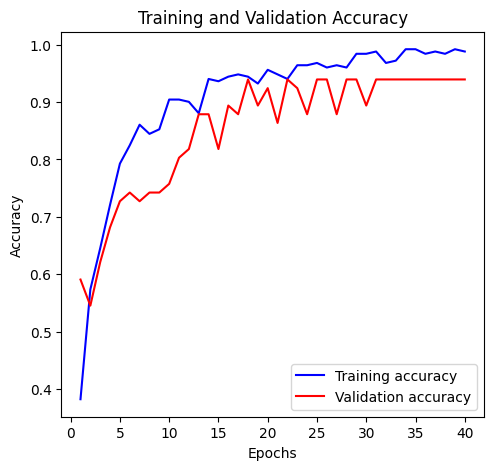

In [98]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

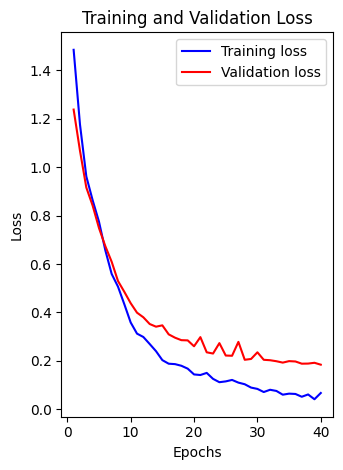

In [99]:
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

### 6C. Number of parameters

In [100]:
total_params = model.count_params()
trainable_params = sum([tf.keras.backend.count_params(w) for w in model.trainable_weights])
bias_params = sum([tf.keras.backend.count_params(w) for w in model.trainable_weights if 'bias' in w.name])

print(f"Total parameters: {total_params}")
print(f"Trainable parameters: {trainable_params}")
print(f"Bias parameters: {bias_params}")

Total parameters: 1625539
Trainable parameters: 1625539
Bias parameters: 227


In [101]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


In [102]:
print("Classification Report:\n", classification_report(y_true, y_pred_classes))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       0.90      0.90      0.90        20
           2       0.90      0.90      0.90        20

    accuracy                           0.94        66
   macro avg       0.93      0.93      0.93        66
weighted avg       0.94      0.94      0.94        66

